In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



In [2]:
# Generate some random data
np.random.seed(42)
X = np.random.rand(100, 15)  # 100 samples with 3 features

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)


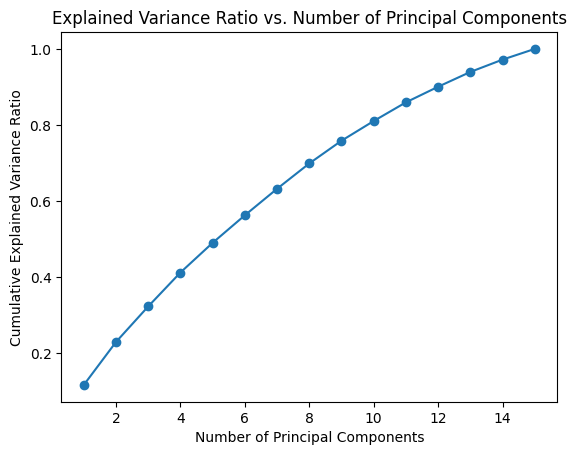

In [3]:

# Plot explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [4]:
# Créer un jeu de données fictif
X = np.random.rand(10000, 36)  # 100 observations, 10 variables

# Calculer la PCA avec différentes valeurs de n_components
pca = PCA()
variance_explained = []
n_components_range = range(1, 346)
for n in n_components_range:
    pca = PCA(n_components=n)
    print(n)
    pca.fit(X)
    variance_explained.append(np.sum(pca.explained_variance_ratio_))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


ValueError: n_components=37 must be between 0 and min(n_samples, n_features)=36 with svd_solver='full'

In [ ]:

# Tracer la variance expliquée en fonction du nombre de composantes principales
plt.plot(n_components_range, variance_explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('Elbow Method for Optimal n_components')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.decomposition import PCA

# Créer un jeu de données fictif
X = np.random.rand(10000, 36)  # Votre ensemble de données

# Calculer la PCA
pca = PCA()
pca.fit(X)

# Choisir le nombre de composantes principales qui retiennent un pourcentage élevé de la variance totale
variance_retention = 0.95  # Par exemple, 95%
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
selected_components = np.argmax(cumulative_variance_ratio >= variance_retention) + 1
print("Nombre de composantes principales sélectionnées pour une rétention de variance de", variance_retention, ":", selected_components)

Nombre de composantes principales sélectionnées pour une rétention de variance de 0.95 : 327


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


In [6]:

# Créer un pipeline avec PCA et un modèle de classification (par exemple, SVM)
pipeline = Pipeline([
    ('pca', PCA()),
    ('svm', SVC())
])


In [7]:

# Définir les valeurs de n_components à tester
n_components_range = range(1, 11)

# Effectuer une validation croisée pour évaluer les performances avec différentes valeurs de n_components
cv_scores = []
for n in n_components_range:
    pipeline.set_params(pca__n_components=n)
    scores = cross_val_score(pipeline, X, y, cv=5)  # Changer y par vos étiquettes cibles si nécessaire
    cv_scores.append(scores.mean())

# Choisir la valeur optimale de n_components qui maximise les performances
optimal_n_components = n_components_range[np.argmax(cv_scores)]
print("Valeur optimale de n_components:", optimal_n_components)

NameError: name 'y' is not defined